In [1]:
import pandas as pd
import numpy as np
import re
import string

from collections import Counter
from nltk.corpus import stopwords

In [2]:
pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199

Load datasets

In [3]:
pos_df = pd.read_csv("Datasets/twitter-datasets/train_pos_full.txt", delimiter="\\n", header=None, 
                     names = ["tweets"], engine='python')
neg_df = pd.read_csv("Datasets/twitter-datasets/train_neg_full.txt", delimiter="\\n", header=None,
                     names = ["tweets"], engine='python')

In [4]:
pos_df

,tweets
0,"<user> i dunno justin read my mention or not . only justin and god knows about that , but i hope you will follow me #believe 15"
1,"because your logic is so dumb , i won't even crop out your name or your photo . tsk . <url>"
2,""" <user> just put casper in a box ! "" looved the battle ! #crakkbitch"
3,<user> <user> thanks sir > > don't trip lil mama ... just keep doin ya thang !
4,visiting my brother tmr is the bestest birthday gift eveerrr ! ! !
...,...
1249995,a warning sign ? (; rt <user> the negativity you bleed out toward others will gradually cripple your own happiness .
1249996,<user> ff too thank youuu ) )
1249997,i just love shumpa ! that's my girl
1249998,"the best way to start a day ! no matter what happens , he makes my heart smile <url>"


Remove numbers

In [5]:
pos_df.tweets = pos_df.tweets.str.replace('\d+', '')
neg_df.tweets = neg_df.tweets.str.replace('\d+', '')

Remove `<user>`

In [6]:
pos_df["tweets"] = pos_df["tweets"].str.replace("<user>", "")
neg_df["tweets"] = neg_df["tweets"].str.replace("<user>", "")

Remove `<url>`

In [7]:
pos_df["tweets"] = pos_df["tweets"].str.replace("<url>", "")
neg_df["tweets"] = neg_df["tweets"].str.replace("<url>", "")

Remove stopwords

In [9]:
stopWords = stopwords.words('english')

In [10]:
stopWords.append('im')

In [11]:
pos_df.tweets = pos_df.tweets.apply(lambda t : " ".join([word for word in t.split() if word not in stopWords]))
neg_df.tweets = neg_df.tweets.apply(lambda t : " ".join([word for word in t.split() if word not in stopWords]))

Remove punctuation

In [12]:
pos_df.tweets = pos_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))
neg_df.tweets = neg_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))

Counts

In [13]:
results_pos = Counter()
pos_df.tweets.str.lower().str.split().apply(results_pos.update)
results_neg = Counter()
neg_df.tweets.str.lower().str.split().apply(results_neg.update)

0          None
1          None
2          None
3          None
4          None
           ... 
1249995    None
1249996    None
1249997    None
1249998    None
1249999    None
Name: tweets, Length: 1250000, dtype: object

In [122]:
count_pos = results_pos.most_common(1000)
count_neg = results_neg.most_common(1000)

dict_count_pos = dict(count_pos)
dict_count_neg = dict(count_neg)

both = dict_count_pos.keys() & (dict_count_neg.keys())

count_total = [(word, dict_count_pos[word]+dict_count_neg[word]) for word in both]
dict_both = dict(count_total)

In [123]:
bar_pos = [(word, dict_count_pos[word]) for word in both if 100*dict_count_pos[word]/dict_both[word]>75]
bar_neg = [(word, dict_count_neg[word]) for word in both if 100*dict_count_neg[word]/dict_both[word]>75]

In [124]:
bar_neg

[('g', 8864),
 ('happened', 3762),
 ('black', 32352),
 ('leaving', 3734),
 ('lost', 7280),
 ('bag', 4114),
 ('small', 4817),
 ('missing', 5410),
 ('set', 15780),
 ('case', 12919),
 ('hate', 21812),
 ('wish', 29534),
 ('red', 8472),
 ('sad', 24209),
 ('light', 4897),
 ('business', 3875),
 ('news', 7208),
 ('cold', 6532),
 ('sick', 8854),
 ('cry', 9763),
 ('f', 6208),
 ('picture', 28901),
 ('miss', 41159),
 ('ipod', 5810),
 ('blue', 8115),
 ('hurt', 5414),
 ('anymore', 8304),
 ('book', 14952),
 ('white', 14243),
 ('c', 10563),
 ('via', 11132),
 ('nooo', 5025),
 ('green', 5481)]

In [125]:
sorted_pos_70 = sorted(bar_pos, key=lambda tup: -tup[1])
sorted_neg_70 = sorted(bar_neg, key=lambda tup: -tup[1])



In [133]:
word = ['love','haha','black', 'sorry','hate','amazing','following','white']
pos = [dict_count_pos[w] for w in word]
neg = [dict_count_neg[w] for w in word]

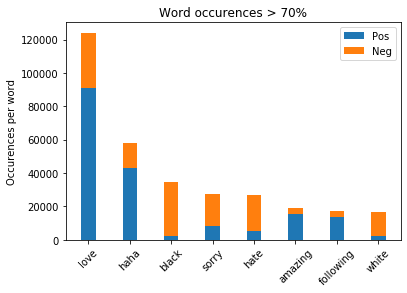

In [135]:
import numpy as np
import matplotlib.pyplot as plt


N = len(word)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pos, width)
p2 = plt.bar(ind, neg, width,
             bottom=pos)

plt.ylabel('Occurences per word')
plt.title('Word occurences > 70%')
plt.xticks(ind, word, rotation=45)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Pos', 'Neg'))


Remove duplicate tweets

In [ ]:
pos_df = pos_df.drop_duplicates(subset=["tweets"])
neg_df = neg_df.drop_duplicates(subset=["tweets"])

Write back to disk

In [ ]:
np.savetxt("Datasets/twitter-datasets/train_pos_full_cleaned.txt", pos_df.values, fmt='%s')
np.savetxt("Datasets/twitter-datasets/train_neg_full_cleaned.txt", neg_df.values, fmt='%s')